# K-Nearest Neighbors (KNN) Classification

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Load tha dataset
df = pd.read_csv('Airline_Passenger_Satisfaction_Dataset.csv', index_col=0)

# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (129880, 24)


In [73]:
df.head() # Display the first few rows of the dataset

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [74]:
df.info() # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 non

In [47]:
df.isnull().sum() # Check for missing values in each column

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [75]:
# Fill missing values with the mean of Arrival Delay in Minutes
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

# Drop id Column
df.drop(columns=['id'], inplace=True)

# Encode categorical variables
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])  # Male:1, Female:0
df['Customer Type'] = label.fit_transform(df['Customer Type'])
df['Type of Travel'] = label.fit_transform(df['Type of Travel'])
df['Class'] = label.fit_transform(df['Class'])
df['satisfaction'] = label.fit_transform(df['satisfaction'])  # Satisfied:1, Neutral/Dissatisfied:0

In [76]:
# Split the dataset into features and target variable
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
# Perform predictions on the test set
y_pred = knn.predict(X_test)
# Calculate accuracy
print("Accuracy of KNN Classifier(K = 5):", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of KNN Classifier(K = 5): 0.9286649214659686
Confusion Matrix:
 [[14116   506]
 [ 1347 10007]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     14622
           1       0.95      0.88      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



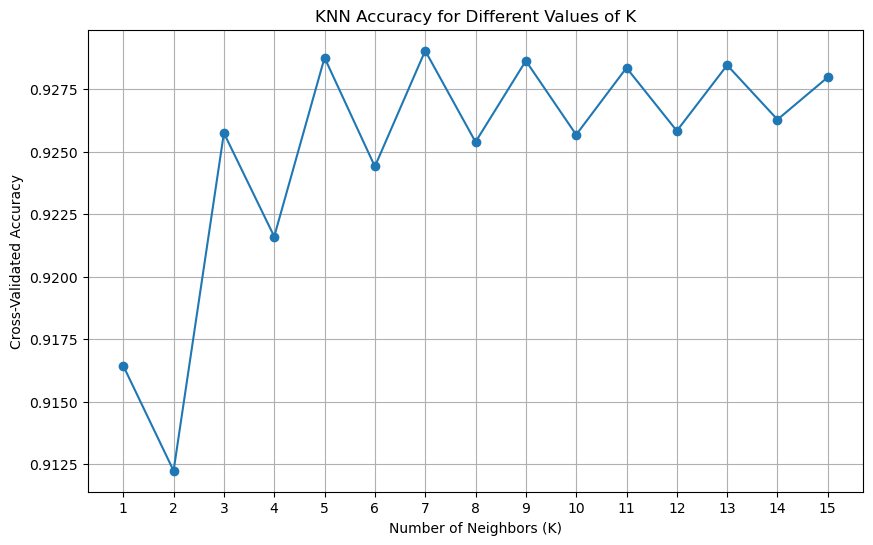

Best K value: 7 with accuracy: 0.9290


In [ ]:
# Experiment with Different Values of K
cv_scores = []  # Store average accuracy for each K

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), cv_scores, marker='o')
plt.xticks(range(1, 16))
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy for Different Values of K")
plt.grid(True)
plt.show()

# Best K
best_k = range(1, 16)[np.argmax(cv_scores)]
print(f"Best K value: {best_k} with accuracy: {max(cv_scores):.4f}")


In [60]:
# Train final KNN model with best K = 7
final_knn = KNeighborsClassifier(n_neighbors= 7)
final_knn.fit(X_train, y_train)
final_pred = final_knn.predict(X_test)

# Evaluate
print("Final Accuracy:", accuracy_score(y_test, final_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, final_pred))
print("\nClassification Report:\n", classification_report(y_test, final_pred))

Final Accuracy: 0.9299353249153064

Confusion Matrix:
 [[14154   468]
 [ 1352 10002]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     14622
           1       0.96      0.88      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [70]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on reduced data
knn_pca = KNeighborsClassifier(n_neighbors= 7)
knn_pca.fit(X_train_pca, y_train)



KNeighborsClassifier(n_neighbors=7)

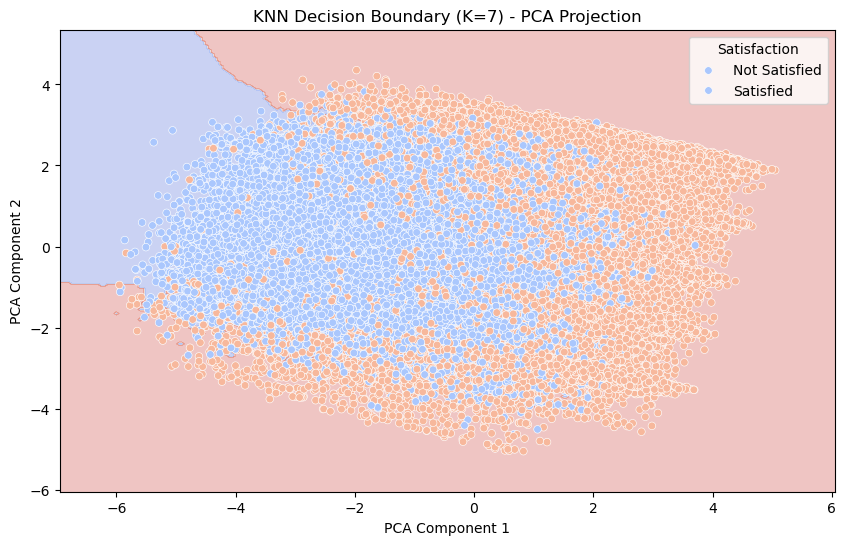

In [71]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.05  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=30)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title="Satisfaction", labels=["Not Satisfied", "Satisfied"])
    plt.show()

# Call the function
plot_decision_boundary(knn_pca, X_train_pca, y_train, f"KNN Decision Boundary (K={best_k}) - PCA Projection")
